## Morbius vs Moon Knight - Sentiment Analysis

The data I've collected could not be considered representative, but they are useful to perform sentiment analysis.

_Import and Setup_

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### Morbius VS Moon Knight

Release date
- Moon Knight: 30-01-2022
- Morbius: 31-01-2022

Data collected for: 31-03-2022 & 01-04-2022

In [2]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\FC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
sent_analyzer = SentimentIntensityAnalyzer()

In [4]:
morbius1 = pd.read_csv('../data/Morbius_31-03-22.csv')

In [5]:
morbius1.dtypes

Unnamed: 0     int64
Name          object
Time          object
Tweet         object
dtype: object

In [6]:
morbius1 = morbius1.drop(['Unnamed: 0'], axis=1)
morbius1['Time'] = pd.to_datetime(morbius1['Time'])
morbius1.head()

,Name,Time,Tweet
0,Mothra 🦋🇵🇸,2022-03-31 10:50:14+00:00,Not everyone. Feel sad for The New Mutants and...
1,Spider-Man Enjoyer,2022-03-31 10:50:13+00:00,@hzjoetv Honestly bro I don’t care about revie...
2,9jalover,2022-03-31 10:50:06+00:00,Morbius’ Post Credits Scene Leaked? Ahead of t...
3,Jordy 🌱,2022-03-31 10:50:06+00:00,since when was morbius “everyone’s” most antic...
4,Buddy Watson,2022-03-31 10:49:56+00:00,Morbius (2022)\n#NowWatching \n\nAlright I’ll ...


In [7]:
morbius1.dtypes

Name                  object
Time     datetime64[ns, UTC]
Tweet                 object
dtype: object

In [8]:
morbius2 = pd.read_csv('../data/Morbius_01-04-22.csv')

In [9]:
morbius2 = morbius2.drop(['Unnamed: 0'], axis=1)
morbius2['Time'] = pd.to_datetime(morbius2['Time'])
morbius2.head()

,Name,Time,Tweet
0,John Combs,2022-04-01 11:51:09+00:00,"@VideoGwen To be clear, if I had planned on se..."
1,Lane,2022-04-01 11:51:09+00:00,Morbius just was not very good unfortunately
2,Vomfee,2022-04-01 11:51:06+00:00,@entom_dp Morbius on epic games store?
3,cranbear 🐻,2022-04-01 11:51:06+00:00,I screamed when I looked at my AMC to see how ...
4,BTS (Big Time Socialists) Fan,2022-04-01 11:51:04+00:00,Can't wait to watch morbius


In [12]:
moon_knight1 = pd.read_csv('../data/Moon Knight_31-03-22.csv')

In [13]:
moon_knight1 = moon_knight1.drop(['Unnamed: 0'], axis=1)
moon_knight1['Time'] = pd.to_datetime(moon_knight1['Time'])
moon_knight1.head()

,Name,Time,Tweet
0,Darian Smith,2022-03-31 10:50:26+00:00,@BingeWatchThis_ Moon knight hands down
1,Murilo 📖: It: A Coisa,2022-03-31 10:50:24+00:00,Acabei de assistir: Moon Knight - S01 | E01 - ...
2,"holland kastellanos (BLM, ACAB)",2022-03-31 10:50:19+00:00,first episode of moon knight was pretty fckn s...
3,Sharjeel Akhtar ✪ | #TASMGANG,2022-03-31 10:50:18+00:00,Moon Knight show got me interested in the char...
4,Anna,2022-03-31 10:50:05+00:00,WATCHING MOON KNIGHT RN OMGMDNDN I LOVE ITT


In [14]:
moon_knight2 = pd.read_csv('../data/Moon Knight_01-04-22.csv')

In [15]:
moon_knight2 = moon_knight2.drop(['Unnamed: 0'], axis=1)
moon_knight2['Time'] = pd.to_datetime(moon_knight2['Time'])
moon_knight2.head()

,Name,Time,Tweet
0,Jason: Human Retweet Machine,2022-04-01 11:51:00+00:00,@dinoMADN3SS Never forget only Moon Knight wou...
1,lily | moon knight era,2022-04-01 11:50:53+00:00,people are talking shit about oscar isaac’s br...
2,Avia,2022-04-01 11:50:38+00:00,Moon Knight is pretty boring so far. The only ...
3,Jacob Kirk || REBORN: FROM DARKNESS,2022-04-01 11:50:13+00:00,Moon Knight ep.1 is probably the best thing in...
4,Jetpack_steve,2022-04-01 11:49:58+00:00,@StephenByrne86 they are so cute and i really ...


_Sentiment Analysis_

Adding scores and labels to df

In [18]:
morbius1['Scores'] = morbius1['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))
morbius2['Scores'] = morbius2['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))
moon_knight1['Scores'] = moon_knight1['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))
moon_knight2['Scores'] = moon_knight2['Tweet'].apply(lambda Tweet:sent_analyzer.polarity_scores(Tweet))

In [19]:
morbius1['Compound'] = morbius1['Scores'].apply(lambda score_dict:score_dict['compound'])
morbius2['Compound'] = morbius2['Scores'].apply(lambda score_dict:score_dict['compound'])
moon_knight1['Compound'] = moon_knight1['Scores'].apply(lambda score_dict:score_dict['compound'])
moon_knight2['Compound'] = moon_knight2['Scores'].apply(lambda score_dict:score_dict['compound'])

In [ ]:
# morbius1['Compound-Score'] = morbius1['Compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
# morbius2['Compound-Score'] = morbius2['Compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
# moon_knight1['Compound-Score'] = moon_knight1['Compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
# moon_knight2['Compound-Score'] = moon_knight2['Compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')

In [ ]:
# morbius1['Compound-Score'] = morbius1['Compound-Score'].astype('category')
# morbius2['Compound-Score'] = morbius2['Compound-Score'].astype('category')
# moon_knight1['Compound-Score'] = moon_knight1['Compound-Score'].astype('category')
# moon_knight2['Compound-Score'] = moon_knight2['Compound-Score'].astype('category')

In [ ]:
# morbius1.dtypes

_Concat dataframes_

In [ ]:
# morbius_12 = pd.concat([morbius1, morbius2])

In [ ]:
# moon_knight_12 = pd.concat([moon_knight1, moon_knight2])

_Save to CSV_

In [ ]:
# morbius_12.to_csv('../data/morbius12_sentiment.csv')

In [ ]:
# moon_knight_12.to_csv('../data/moonknight12_sentiment.csv')

_Data Visualization_

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Morbius Sentiment')

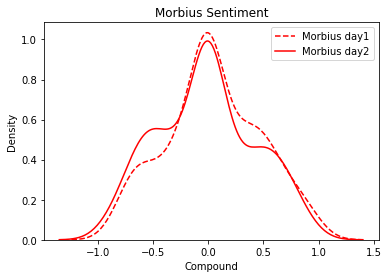

In [30]:
ax1 = sns.kdeplot(data=morbius1, x='Compound', label = 'Morbius day1', color = 'r', linestyle='--')
ax2 = sns.kdeplot(data=morbius2, x='Compound', label = 'Morbius day2', color = 'r')

plt.legend()
plt.title('Morbius Sentiment')

We can observe that, on the second day, the sentiment for "Morbius" went up on the negative side and went down on the positive side.

Text(0.5, 1.0, 'Moon Knight Sentiment')

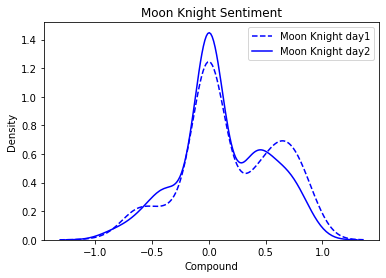

In [31]:
ax3 = sns.kdeplot(data=moon_knight1, x='Compound', label = 'Moon Knight day1', color = 'blue', linestyle='--')
ax4 = sns.kdeplot(data=moon_knight2, x='Compound', label = 'Moon Knight day2', color = 'blue')

plt.legend()
plt.title('Moon Knight Sentiment')

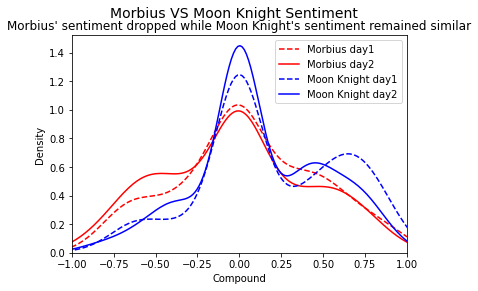

In [51]:
ax1 = sns.kdeplot(data=morbius1, x='Compound', label = 'Morbius day1', color = 'r', linestyle='--')
ax2 = sns.kdeplot(data=morbius2, x='Compound', label = 'Morbius day2', color = 'r')

ax3 = sns.kdeplot(data=moon_knight1, x='Compound', label = 'Moon Knight day1', color = 'blue', linestyle='--')
ax4 = sns.kdeplot(data=moon_knight2, x='Compound', label = 'Moon Knight day2', color = 'blue')

ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax3.set_xlim(-1,1)
ax4.set_xlim(-1,1)

plt.legend()
plt.suptitle('Morbius VS Moon Knight Sentiment', fontsize=14)
plt.title('Morbius\' sentiment dropped while Moon Knight\'s sentiment remained similar')
plt.savefig('../figures/morbiusVSmoonknight.png', dpi=300, bbox_inches = 'tight', facecolor='white', transparent=False)